<a href="https://colab.research.google.com/github/LouisP96/Neural_Networks_from_Scratch/blob/master/2_3_layer_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/GitHub/Neural_Networks_from_Scratch

/content/drive/MyDrive/GitHub/Neural_Networks_from_Scratch


In [ ]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
# Load dataset

trainxs = np.load("Data/fashion-train-imgs.npz")
trainys = np.load("Data/fashion-train-labels.npz")
devxs = np.load("Data/fashion-dev-imgs.npz")
devys = np.load("Data/fashion-dev-labels.npz")
testxs = np.load("Data/fashion-test-imgs.npz")
testys = np.load("Data/fashion-test-labels.npz")

##Data exploration & preparation##

Y Label: 0


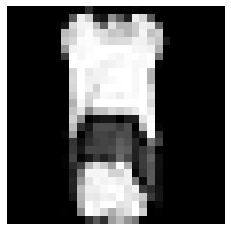

Y Label: 0


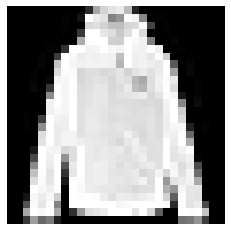

In [ ]:
# Display an example image with label, specify number below

examples_to_show = list(range(40,42))

for example in examples_to_show:
  print(f"Y Label: {trainys[example]}")

  plt.imshow(trainxs[:, :, example].T, cmap='gray')
  plt.axis('off')
  plt.show()

In [ ]:
# Reshape data (flatten images to 1D)

def flatten_2D_images(nparray):
  return np.reshape(nparray, (nparray.shape[0]*nparray.shape[1], nparray.shape[2]))

trainxs_flat = flatten_2D_images(trainxs)
devxs_flat = flatten_2D_images(devxs)
testxs_flat = flatten_2D_images(testxs)

print(f"Original train data shape: {trainxs.shape}")
print(f"Flattened train data shape: {trainxs_flat.shape}")
print(f"Original dev data shape: {devxs.shape}")
print(f"Flattened dev data shape: {devxs_flat.shape}")
print(f"Original test data shape: {testxs.shape}")
print(f"Flattened test data shape: {testxs_flat.shape}")

Original train data shape: (28, 28, 12000)
Flattened train data shape: (784, 12000)
Original dev data shape: (28, 28, 1000)
Flattened dev data shape: (784, 1000)
Original test data shape: (28, 28, 1000)
Flattened test data shape: (784, 1000)


##Useful Values##

In [ ]:
# Number of examples in each dataset
train_n = trainxs_flat.shape[1]
dev_n = devxs_flat.shape[1]
test_n = testxs_flat.shape[1]

# Number of dimesions in each image
dims = trainxs_flat.shape[0]

# Pixel value range
pixel_value_max = np.amax(trainxs_flat)
pixel_value_min = np.amin(trainxs_flat)
print(f"Max pixel value: {pixel_value_max}")
print(f"Min pixel value: {pixel_value_min}")

Max pixel value: 1.0
Min pixel value: 0.0


##Common Functions##

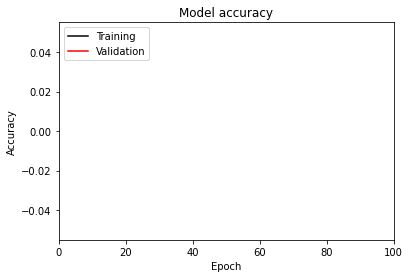

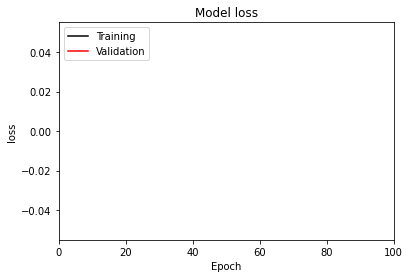

In [ ]:
# Skeleton for plots

NUMBER_OF_EPOCHS = 100

# Accuracy
list_of_train_accuracies = [] 
list_of_dev_accuracies = []

plt.plot(list_of_train_accuracies, color='k', linestyle='-')
plt.plot(list_of_dev_accuracies, color='r', linestyle='-')
plt.title(f'Model accuracy',  color='k')
plt.ylabel('Accuracy',  color='k')
plt.xlabel('Epoch',  color='k')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.tick_params(colors='k')
plt.xlim(0, NUMBER_OF_EPOCHS)
# plt.savefig("accuracy_plot.png", dpi=300)
plt.show()

# Loss
list_of_train_loss = []
list_of_dev_loss = []

plt.plot(list_of_train_loss, color='k', linestyle='-')
plt.plot(list_of_dev_loss, color='r', linestyle='-')
plt.title(f'Model loss',  color='k')
plt.ylabel('loss',  color='k')
plt.xlabel('Epoch',  color='k')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.tick_params(colors='k')
plt.xlim(0, NUMBER_OF_EPOCHS)
# plt.savefig("loss_plot.png", dpi=300)
plt.show()

In [ ]:
# Code to generate random indices to shuffle going through training dataset
# (include shuffled_indices as the iterator in training for loop)

shuffled_indices = [*range(0, train_n, 1)]
np.random.shuffle(shuffled_indices)

In [ ]:
# Early stopping code

# if len(train_accuracy_per_epoch) >= 30:
#   if (np.mean(train_accuracy_per_epoch[-20:]) - np.mean(train_accuracy_per_epoch[-30:-10])) < 0:
#     print("break")
#     break 

# MLP implementation





LEARNING RATE: 0.1
MOMENTUM: 0.9
BATCH SIZE: 32
Loss after iteration 0: 0.683117
Accuracy after iteration 0: 0.575417
Loss after iteration 100: 0.079084
Accuracy after iteration 100: 0.980083
Model Converged


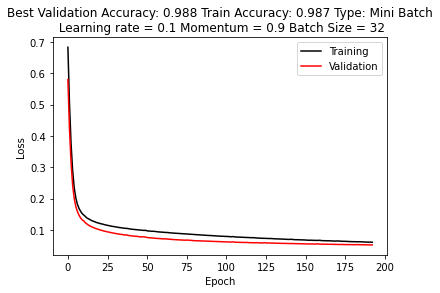

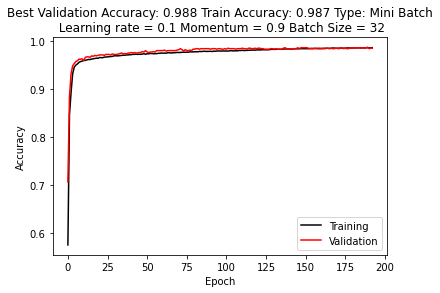

best_dev_accuracy: 0.988
train_accuracy: 0.9871666666666666
best_epoch: 189




LEARNING RATE: 0.1
MOMENTUM: 0.9
BATCH SIZE: 64
Loss after iteration 0: 0.667054
Accuracy after iteration 0: 0.616417
Loss after iteration 100: 0.098701
Accuracy after iteration 100: 0.973000
Loss after iteration 200: 0.080410
Accuracy after iteration 200: 0.979500
Model Converged


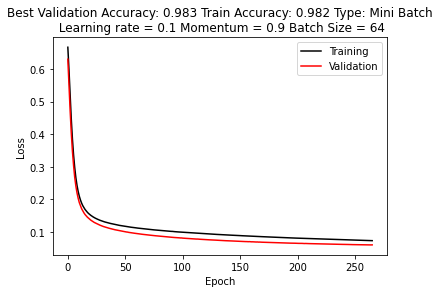

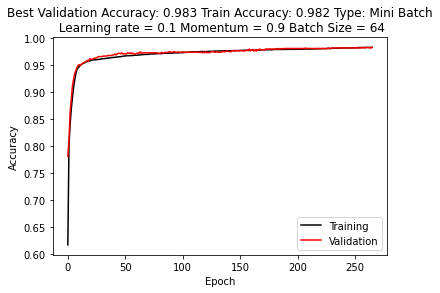

best_dev_accuracy: 0.983
train_accuracy: 0.98225
best_epoch: 251




LEARNING RATE: 0.1
MOMENTUM: 0.9
BATCH SIZE: 256
Loss after iteration 0: 0.737292
Accuracy after iteration 0: 0.500000
Loss after iteration 100: 0.135876
Accuracy after iteration 100: 0.961167
Loss after iteration 200: 0.114979
Accuracy after iteration 200: 0.967583
Loss after iteration 300: 0.104890
Accuracy after iteration 300: 0.971417
Model Converged


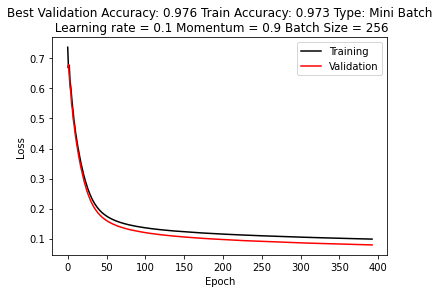

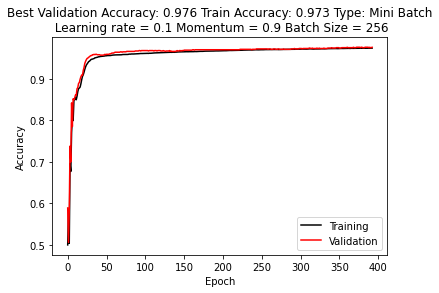

best_dev_accuracy: 0.976
train_accuracy: 0.9732500000000001
best_epoch: 360




LEARNING RATE: 0.1
MOMENTUM: 0.0
BATCH SIZE: 32
Loss after iteration 0: 0.984113
Accuracy after iteration 0: 0.500250
Loss after iteration 100: 0.148274
Accuracy after iteration 100: 0.958417
Loss after iteration 200: 0.120293
Accuracy after iteration 200: 0.966250
Loss after iteration 300: 0.108874
Accuracy after iteration 300: 0.970167
Model Converged


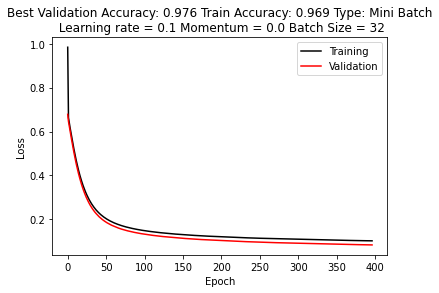

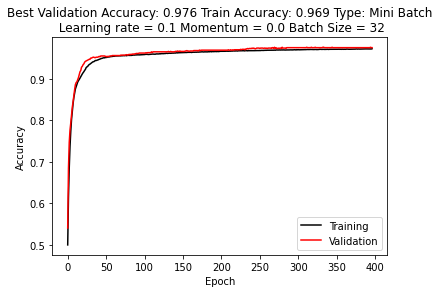

best_dev_accuracy: 0.976
train_accuracy: 0.9691666666666666
best_epoch: 269




LEARNING RATE: 0.1
MOMENTUM: 0.0
BATCH SIZE: 64
Loss after iteration 0: 0.740419
Accuracy after iteration 0: 0.362333
Loss after iteration 100: 0.186268
Accuracy after iteration 100: 0.955417
Loss after iteration 200: 0.141411
Accuracy after iteration 200: 0.961167
Loss after iteration 300: 0.125656
Accuracy after iteration 300: 0.965000
Loss after iteration 400: 0.116817
Accuracy after iteration 400: 0.967417
Model Converged


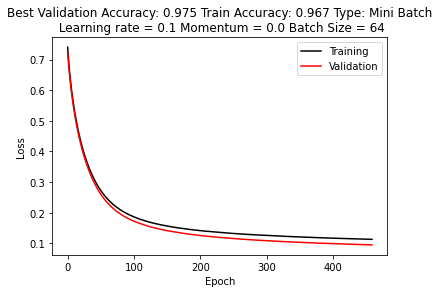

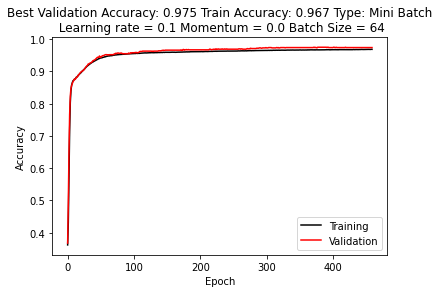

best_dev_accuracy: 0.975
train_accuracy: 0.9667499999999999
best_epoch: 371




LEARNING RATE: 0.1
MOMENTUM: 0.0
BATCH SIZE: 256
Loss after iteration 0: 0.762894
Accuracy after iteration 0: 0.500000
Loss after iteration 100: 0.380480
Accuracy after iteration 100: 0.912333
Loss after iteration 200: 0.268899
Accuracy after iteration 200: 0.940333
Loss after iteration 300: 0.216853
Accuracy after iteration 300: 0.948167
Loss after iteration 400: 0.188639
Accuracy after iteration 400: 0.953083
Loss after iteration 500: 0.171286
Accuracy after iteration 500: 0.955250
Loss after iteration 600: 0.159596
Accuracy after iteration 600: 0.956917
Loss after iteration 700: 0.151130
Accuracy after iteration 700: 0.957917
Model Converged


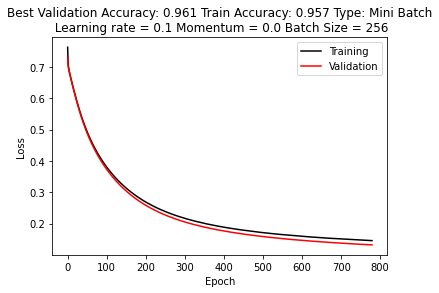

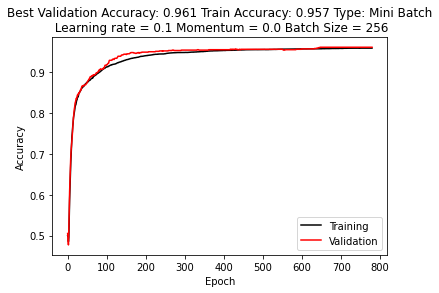

best_dev_accuracy: 0.961
train_accuracy: 0.9573333333333333
best_epoch: 646




LEARNING RATE: 0.01
MOMENTUM: 0.9
BATCH SIZE: 32
Loss after iteration 0: 0.730701
Accuracy after iteration 0: 0.508250
Loss after iteration 100: 0.148988
Accuracy after iteration 100: 0.958917
Loss after iteration 200: 0.122156
Accuracy after iteration 200: 0.964917
Loss after iteration 300: 0.110485
Accuracy after iteration 300: 0.970083
Loss after iteration 400: 0.102921
Accuracy after iteration 400: 0.971750
Model Converged


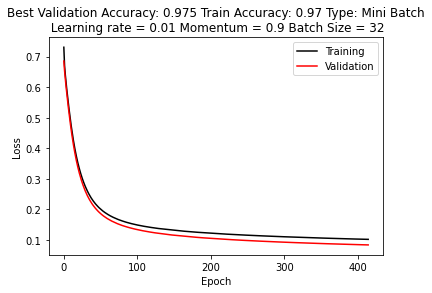

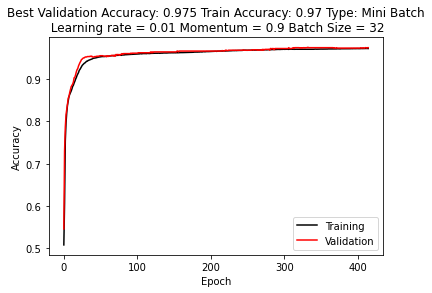

best_dev_accuracy: 0.975
train_accuracy: 0.9702500000000001
best_epoch: 332




LEARNING RATE: 0.01
MOMENTUM: 0.9
BATCH SIZE: 64
Loss after iteration 0: 0.849054
Accuracy after iteration 0: 0.500000
Loss after iteration 100: 0.200556
Accuracy after iteration 100: 0.950167
Loss after iteration 200: 0.149633
Accuracy after iteration 200: 0.957833
Loss after iteration 300: 0.132351
Accuracy after iteration 300: 0.961583
Loss after iteration 400: 0.122694
Accuracy after iteration 400: 0.964417
Model Converged


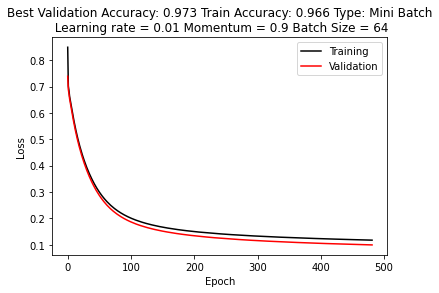

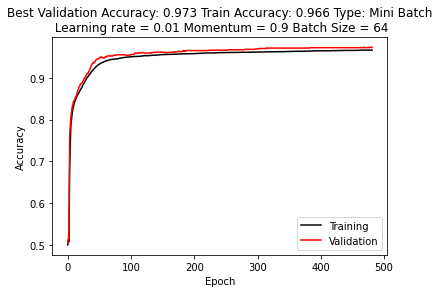

best_dev_accuracy: 0.973
train_accuracy: 0.9660833333333332
best_epoch: 468




LEARNING RATE: 0.01
MOMENTUM: 0.9
BATCH SIZE: 256
Loss after iteration 0: 0.687959
Accuracy after iteration 0: 0.520333
Loss after iteration 100: 0.406191
Accuracy after iteration 100: 0.900250
Loss after iteration 200: 0.281665
Accuracy after iteration 200: 0.938417
Loss after iteration 300: 0.222738
Accuracy after iteration 300: 0.949500
Loss after iteration 400: 0.191516
Accuracy after iteration 400: 0.953417
Loss after iteration 500: 0.172845
Accuracy after iteration 500: 0.956000
Loss after iteration 600: 0.160521
Accuracy after iteration 600: 0.958417
Loss after iteration 700: 0.151755
Accuracy after iteration 700: 0.959750
Model Converged


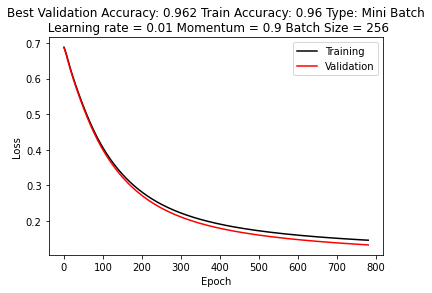

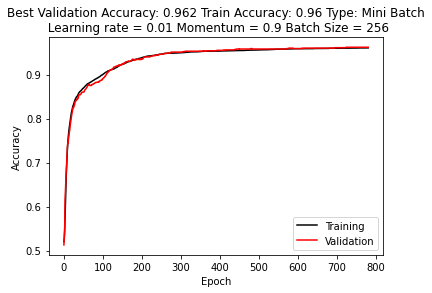

best_dev_accuracy: 0.962
train_accuracy: 0.9599166666666666
best_epoch: 724




LEARNING RATE: 0.01
MOMENTUM: 0.0
BATCH SIZE: 32
Loss after iteration 0: 0.733480
Accuracy after iteration 0: 0.500000
Loss after iteration 100: 0.466267
Accuracy after iteration 100: 0.871583
Loss after iteration 200: 0.344895
Accuracy after iteration 200: 0.916333
Loss after iteration 300: 0.271422
Accuracy after iteration 300: 0.942750
Loss after iteration 400: 0.226910
Accuracy after iteration 400: 0.950417
Loss after iteration 500: 0.199388
Accuracy after iteration 500: 0.955250
Loss after iteration 600: 0.181347
Accuracy after iteration 600: 0.957000
Loss after iteration 700: 0.168798
Accuracy after iteration 700: 0.958667
Loss after iteration 800: 0.159602
Accuracy after iteration 800: 0.959167
Loss after iteration 900: 0.152579
Accuracy after iteration 900: 0.959750
Model Converged


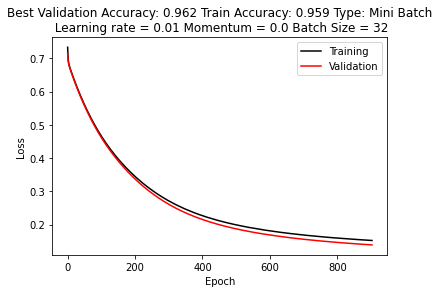

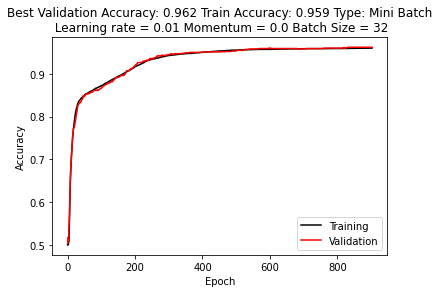

best_dev_accuracy: 0.962
train_accuracy: 0.9591666666666668
best_epoch: 831




LEARNING RATE: 0.01
MOMENTUM: 0.0
BATCH SIZE: 64
Loss after iteration 0: 0.736502
Accuracy after iteration 0: 0.499500
Loss after iteration 100: 0.566985
Accuracy after iteration 100: 0.845167
Loss after iteration 200: 0.462112
Accuracy after iteration 200: 0.876583
Loss after iteration 300: 0.388411
Accuracy after iteration 300: 0.900500
Loss after iteration 400: 0.334133
Accuracy after iteration 400: 0.921250
Loss after iteration 500: 0.293318
Accuracy after iteration 500: 0.935917
Loss after iteration 600: 0.262543
Accuracy after iteration 600: 0.943750
Loss after iteration 700: 0.239185
Accuracy after iteration 700: 0.947833
Loss after iteration 800: 0.221195
Accuracy after iteration 800: 0.949833
Loss after iteration 900: 0.207086
Accuracy after iteration 900: 0.951667
Loss after iteration 1000: 0.195822
Accuracy after iteration 1000: 0.953000
Loss after iteration 1100: 0.186640
Accuracy after iteratio

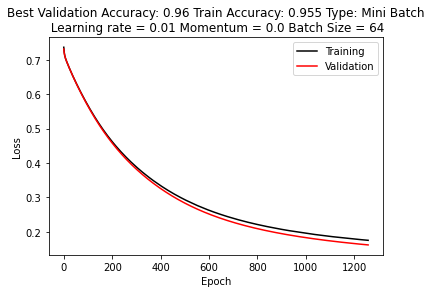

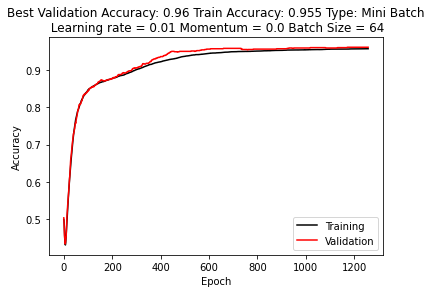

best_dev_accuracy: 0.96
train_accuracy: 0.9550833333333332
best_epoch: 1171




LEARNING RATE: 0.01
MOMENTUM: 0.0
BATCH SIZE: 256
Loss after iteration 0: 0.693026
Accuracy after iteration 0: 0.502917
Loss after iteration 100: 0.636327
Accuracy after iteration 100: 0.728917
Loss after iteration 200: 0.600066
Accuracy after iteration 200: 0.782750
Loss after iteration 300: 0.567010
Accuracy after iteration 300: 0.814833
Loss after iteration 400: 0.536329
Accuracy after iteration 400: 0.839250
Loss after iteration 500: 0.508003
Accuracy after iteration 500: 0.855167
Loss after iteration 600: 0.482067
Accuracy after iteration 600: 0.867000
Loss after iteration 700: 0.458409
Accuracy after iteration 700: 0.875167
Loss after iteration 800: 0.436826
Accuracy after iteration 800: 0.883583
Loss after iteration 900: 0.417070
Accuracy after iteration 900: 0.891083
Loss after iteration 1000: 0.398932
Accuracy after iteration 1000: 0.898917
Loss after iteration 1100: 0.382223
Accuracy after iterati

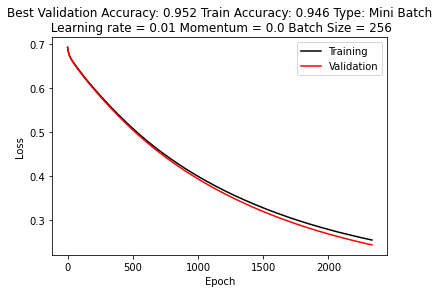

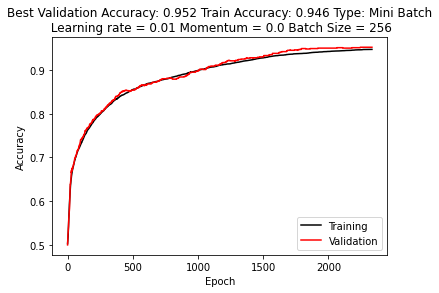

best_dev_accuracy: 0.952
train_accuracy: 0.94625
best_epoch: 2245


In [11]:
# Implementation and hyperparameter selection for the 3 layer MLP trained using mini batch gradient descent
# Hyperparameters grid searched through: batch size, learning rate, momentum

def logistic(x):
  """
  The logistic function
  """
  return 1.0 / (1.0 + np.exp(-x))

def logistic_prime(x):
  """
  Differential of logistic function
  """
  return np.multiply(logistic(x), (1 - logistic(x)))

def predict(z):
  """
  Convert final layer activations into predictions
  """
  if z >= 0.5:
    return 1
  else:
    return 0

def build_model(layer_dims):
    """
    Specify the structure of the network and initialise the parameters
    """
    parameters = {}                # Create a dictionary to store all parameter values
    L = len(layer_dims)            # Number of layers in the network

    for l in range(1, L): # Layer 0 is the input layer, so no weights to initialise
        # Intilisation using Glorot Initilisation
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * np.sqrt(6/(layer_dims[l - 1] + layer_dims[l]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
               
    return parameters


def forward_pass(X, parameters):
    """
    Pass data through network as a forward pass
    Repetitve application of sigmoid on linear function
    """
    caches = []
    
    A = X
    L = len(parameters) // 2    # Number of layers in the neural network. Dividing by 2 as parameter variable includes W and b per layer
    
    # Compute linear and sigmoid at each layer
    for l in range(1, L):
        A_prev = A 
        
        W = parameters['W' + str(l)] # Calling corresponding W from dictionary 'parameters'
        b = parameters['b' + str(l)] # Calling corresponding b from dictionary 'parameters'
        
        # Linear calculation
        Z = np.dot(W, A_prev) + b
        # Store parameters that generate Z, for backprop
        linear_cache = (A_prev, W, b)
        
        # Sigmoid Activation Function
        A = logistic(Z)
        # Store Z that generates A, for backprop
        activation_cache = Z

        # Store both caches together and add to 'caches'
        cache = (linear_cache, activation_cache) 
        caches.append(cache)
    
    # Same as code in loop, just for the last layer which will be used to compute loss
    A_prev = A 
        
    W=parameters['W' + str(L)]
    b=parameters['b' + str(L)]
    
    Z = np.dot(W, A_prev) + b
    linear_cache = (A_prev, W, b)
    
    AL = logistic(Z)
    activation_cache = Z
    
    cache = (linear_cache, activation_cache)
    caches.append(cache)
               
    return AL, caches


def loss_fun(AL, Y):
    """
    Negative log likelihood loss function
    """
    m = Y.shape[0]

    # Compute loss from output (AL) and expected output (Y)
    loss = -(1/m) * np.sum((Y * np.log(AL)) + (1-Y) * np.log(1-AL))
    
    # Make sure loss is regular array, not array in array
    loss = np.squeeze(loss)      
    
    return loss

def model_accuracy(dataX, Y):
    """
    Evaluate how accurate the model is on a given dataset
    """
    
    m = Y.shape[0]
    
    correct = 0
    for i in range(dataX.shape[1]):
        item = np.array(dataX[:, i])
        itemY = Y[i]            
        if itemY == predict(item):
            correct += 1
    
    accuracy = (correct / m)
    
    accuracy = np.squeeze(accuracy)
    return accuracy

def backprop(dA, cache):
    """
    General function for backprop gradients from one activation to a previous activation
    """

    linear_cache, activation_cache = cache
    
    # First we calculate dL/dZ
    Z = activation_cache
    # Apply Sigmoid
    s = logistic(Z)
    # dL/dZ in general form
    dZ = dA * s * (1-s)
    
    # Using this, we can calculate the other differentials
    # Call our parameters
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    # dL/dW, dL/db and dL/dA_prev in general form
    dW = (1/m) * np.dot(dZ, np.transpose(A_prev))
    db = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(np.transpose(W), dZ)
        
    return dA_prev, dW, db

def backprop_loop(AL, Y, caches):
    """
    Calculate gradients for backpropogation for all L layers.
    Takes model output AL and expected output as well as cache of parameter values.
    """

    grads = {} # Dictionary to store gradients
    L = len(caches) # Number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # Y is the same shape as AL
    
    # Initialising backprop
    dAL = AL - Y
    
    # Gradients from the last layer
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = backprop(dAL, current_cache) 
                                                                                               
    # Gradients from rest of the layers
    for l in reversed(range(L-1)): 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = backprop(grads['dA' + str(l+2)], current_cache)
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate, momentum_coefficient, velocity_old):
    """
    Update all the parameters using the gradients calculated via backpropogation
    """

    L = len(parameters) // 2 # Number of layers in the neural network. Divide by 2 because parameters contains W & b
    weight_increment = {}
    velocity_new = {}
    
    for l in range(L):
        weight_increment["W"+str(l+1)] = learning_rate * grads["dW" + str(l+1)]
        weight_increment["b"+str(l+1)] = learning_rate * grads["db" + str(l+1)]
        
        velocity_new["W" + str(l+1)] = momentum_coefficient * velocity_old["W" + str(l+1)] + weight_increment["W" + str(l+1)]
        velocity_new["b" + str(l+1)] = momentum_coefficient * velocity_old["b" + str(l+1)] + weight_increment["b" + str(l+1)]
        
        # With momentum
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - velocity_new["W" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - velocity_new["b" + str(l+1)]

#         Without momentum
#         parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - weight_increment["W" + str(l+1)]
#         parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - weight_increment["b" + str(l+1)]

    return parameters, velocity_new

def batchify(array, n, ax):
    """
    Split the dataset into batches of a specified size ready for mini-batch gradient descent
    """

    amount = dims // n
    return np.array_split(array, amount, axis=ax)

def shuffle(X, Y):
  """
  Shuffle the order of the training dataset images in the numpy array containing them.
  This can improve convergence.
  """

  shuffled_indices = [*range(0, train_n, 1)]
  np.random.shuffle(shuffled_indices)
  newX = np.zeros((dims, train_n))
  newY = np.zeros((train_n))

  for j, i in enumerate(shuffled_indices):
      newX[:, j] = trainxs_flat[:, i]
      newY[j] = trainys[i]
  
  return newX, newY

def L_layer_model(X, Y, layers_dims, learning_rate, momentum_coefficient, max_epochs, batch_size):
    # Specify the type of gradient descent being performed (will update plot titles automatically)
    train_type = "Mini Batch"
    
    # Keep track of loss and accuracy of each epoch
    loss = []                         
    accs = []
    converged = False
    i = 0
    
    dev_loss = []
    dev_accuracies = []
    
    best_dev_accuracy = 0
    
    parameters = build_model(layers_dims)

    # Empty the velocity
    velocity = {"W1": np.array([0.0]), "W2": np.array([0.0]), "W3": np.array([0.0]), "b1": np.array([0.0]), "b2": np.array([0.0]), "b3": np.array([0.0])} # 3 layer version
#     velocity = {"W1": np.array([0.0]), "W2": np.array([0.0]), "b1": np.array([0.0]), "b2": np.array([0.0])} #2 layer version
    
    while (converged == False) and (i <= max_epochs):
        newX, newY = shuffle(X, Y)

#       Mini-Batch if batch_size set > 1 or SGD if batch size set = 1

        batchesX = batchify(newX, batch_size, 1)
        batchesY = batchify(newY, batch_size, 0)
        acc_total = 0
        loss_total = 0
        for b in range(len(batchesX)):
            bx = batchesX[b]
            by = batchesY[b]
            
            AL, caches = forward_pass(bx, parameters)
            loss_single_batch = loss_fun(AL, by)
            loss_total += loss_single_batch
            acc_single_batch = model_accuracy(AL, by)
            acc_total += acc_single_batch
            grads = backprop_loop(AL, by, caches)
            parameters, velocity_new = update_parameters(parameters, grads, learning_rate, momentum_coefficient, velocity)
            velocity = velocity_new
        
        loss_fulldataset = loss_total/(len(batchesX))
        accuracy_fulldataset = acc_total/(len(batchesX))

        """
        # Full-Batch - uncomment this if you wish to run full batch
        
        
        AL, caches = forward_pass(newX, parameters)
        # prev = parameters
        loss_fulldataset = loss_fun(AL, newY)
        accuracy_fulldataset = model_accuracy(AL, newY)
        grads = backprop_loop(AL, newY, caches)
        parameters, velocity_new = update_parameters(parameters, grads, learning_rate, momentum_coefficient, velocity) 
        velocity = velocity_new
        """
        
        # Add the epochs training loss and accuracy values to lists, ready for plotting
        loss.append(loss_fulldataset)
        accs.append(accuracy_fulldataset)
        
        # Print out the training loss and accuracy every 100 epochs
        if i % 100 == 0:
            print ("Loss after iteration %i: %f" % (i, loss_fulldataset))
            print ("Accuracy after iteration %i: %f" % (i, accuracy_fulldataset))
                
        # Calculate loss and accuracy on validation dataset using current epoch's parameters
        out = forward_pass(devxs_flat, parameters)
        dev_los = loss_fun(out[0], devys)
        dev_accuracy = model_accuracy(out[0], devys)
        if i == 0 or i % 1 == 0:
            dev_loss.append(dev_los)
            dev_accuracies.append(dev_accuracy)
        
        # Store the epochs results and parameters if it is the highest validation accuracy so far
        if dev_accuracy > best_dev_accuracy:
            best_dev_accuracy = dev_accuracy    
            best_train_accuracy = accuracy_fulldataset
            best_epoch = i
            best_dev_parameters = parameters
        
        # Early stopping criteria
        if i >= 100:
            if (np.mean(dev_loss[-15:]) - np.mean(dev_loss[-30:-15])) > -.001:
                converged = True
                print("Model Converged") 
        
        i += 1

    # Format title of plots to reflect the hyperparameters and metrics    
    title = "Best Validation Accuracy: " +  str(np.round(best_dev_accuracy, 3)) + " Train Accuracy: " + str(np.round(best_train_accuracy, 3)) +  " Type: " + train_type + "\n Learning rate = " + str(learning_rate)
    if momentum_coefficient != -1: # Omit momentum in title if not needed
      title += " Momentum = " + str(momentum_coefficient)
    if batch_size != -1: # Put -1 in batch_size to omit batch size from plot titles (e.g. if doing SGD)
      title += " Batch Size = " + str(batch_size)
    
    # Plot the training and validation loss
    plt.plot(np.squeeze(loss), color='k')
    plt.plot(np.squeeze(dev_loss), color='r')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title(title)
    # plt.savefig(f"loss_plot_{str(np.round(best_dev_accuracy, 4))}_{best_epoch}.png", dpi=300)
    plt.show()
    
    # Plot the training and validation accuracy
    plt.plot(np.squeeze(accs), color='k')
    plt.plot(np.squeeze(dev_accuracies), color='r')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title(title)
    # plt.savefig(f"accuracy_plot_{str(np.round(best_dev_accuracy, 4))}_{best_epoch}.png", dpi=300)
    plt.show()

    best_model = (best_dev_accuracy, best_train_accuracy, best_epoch, best_dev_parameters)
        
    return parameters, best_model

# Set dimensionality of each layer
layers_dims = [784, 100, 60, 1]

# Select hyperparameters using grid search
learning_rates = [0.1,0.01]
batch_sizes = [32,64,256]
momentums = [0.9, 0.0]

stored_best_models = {}

# Loop through hyperparameters (grid search)
for i in range(len(learning_rates)):  
    for j in range(len(momentums)):
        for b in range(len(batch_sizes)):
            rate = learning_rates[i]
            momentum = momentums[j]
            batch = batch_sizes[b]
            print("\n")
            print("\n")
            print(f"LEARNING RATE: {rate}")
            print(f"MOMENTUM: {momentum}")
            print(f"BATCH SIZE: {batch}")

            parameters, best_model = L_layer_model(trainxs_flat, 
                                                   trainys,
                                                   layers_dims, 
                                                   learning_rate = rate, 
                                                   max_epochs=5000,
                                                   momentum_coefficient=momentum, 
                                                   batch_size=batch)

            stored_best_models[str(rate) + "-" + str(momentum) + "-" + str(batch)] = best_model

            # Print out results for epoch with best validation accuracy
            best_dev_accuracy, best_train_accuracy, best_epoch, best_dev_parameters = best_model
            print(f"best_dev_accuracy: {best_dev_accuracy}")
            print(f"train_accuracy: {best_train_accuracy}")
            print(f"best_epoch: {best_epoch}")
